# Machine Learning  -  CAC 2

# **HDFC BANK** datasets (16th may 2020 - 16th may 2024)

### Submitted by :
### Name : **Manish Kumar**
### Register number : **23122022**
### Class : **3MScDS A**

# Datasets Description

### **Context** : 

The data is the price history and trading volumes of HDFC Bank datsets from NSE (National Stock Exchange) India. The data in the dataset spans from 16th May, 2020 to 16th May, 2024.

Dataset link : https://finance.yahoo.com/quote/HDFCBANK.NS/history?period1=1589587200&period2=1715849843

### **Columns Description :**


**Date -** Trade Data: Represents the date of the trading data, indicating when the stock market activity occurred.

**Open -** Opening Price for the Day: Represents the initial price at which a stock is traded on a given day.

**High -** Highest Price for the Day: Denotes the highest trading price reached by the stock during the trading day.

**Low -** Lowest Price for the Day: Represents the lowest trading price reached by the stock during the trading day.

**Close -** Closing Price: Indicates the final trading price of the stock at the end of the trading day.

**Adj Close -** The adjusted closing price takes dividends, stock splits, and new stock offerings into account. The adjusted closing price is a more accurate indicator of stock value since it starts where the closing price finishes.

**Volume -** Volume Traded for the Day: Represents the total number of shares or contracts traded during a specific time period, typically a trading day.

## Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Datasets

In [2]:
# Importing datasets

df = pd.read_csv("HDFCBANK.NS.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-18,888.000000,888.000000,831.299988,836.650024,803.166138,23324982
1,2020-05-19,860.849976,867.299988,826.099976,830.650024,797.406189,23730346
2,2020-05-20,836.450012,864.000000,832.200012,857.099976,822.797668,20007153
3,2020-05-21,861.450012,884.000000,852.299988,859.549988,825.149597,24239454
4,2020-05-22,850.000000,870.299988,833.049988,838.849976,805.278015,21023716
...,...,...,...,...,...,...,...
987,2024-05-10,1439.000000,1451.949951,1426.800049,1437.900024,1437.900024,13638304
988,2024-05-13,1432.000000,1459.800049,1430.300049,1455.250000,1455.250000,13523601
989,2024-05-14,1452.250000,1465.500000,1450.300049,1460.949951,1460.949951,12832571
990,2024-05-15,1459.699951,1459.699951,1435.800049,1438.500000,1438.500000,19465998


# Data Reading and Cleaning

In [3]:
# Printing top 10 rows
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-18,888.000000,888.000000,831.299988,836.650024,803.166138,23324982
1,2020-05-19,860.849976,867.299988,826.099976,830.650024,797.406189,23730346
2,2020-05-20,836.450012,864.000000,832.200012,857.099976,822.797668,20007153
3,2020-05-21,861.450012,884.000000,852.299988,859.549988,825.149597,24239454
4,2020-05-22,850.000000,870.299988,833.049988,838.849976,805.278015,21023716
5,2020-05-26,857.000000,871.750000,848.750000,852.400024,818.285767,19002576
6,2020-05-27,859.900024,909.799988,857.150024,903.650024,867.484680,28012877
7,2020-05-28,920.000000,950.000000,913.950012,945.250000,907.419800,37744403
8,2020-05-29,944.000000,955.000000,923.450012,951.650024,913.563599,26512583
9,2020-06-01,975.000000,995.000000,966.099976,987.650024,948.122803,19595115


In [4]:
# Printing bottom 10 rows
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
982,2024-05-03,1533.250000,1540.599976,1507.199951,1519.599976,1499.128662,15932621
983,2024-05-06,1522.000000,1534.500000,1517.150024,1522.650024,1502.137695,14396698
984,2024-05-07,1521.949951,1524.050049,1504.150024,1506.150024,1485.859985,14240301
985,2024-05-08,1495.949951,1496.949951,1480.349976,1482.650024,1462.676514,20843931
986,2024-05-09,1474.949951,1486.750000,1445.300049,1447.500000,1428.000000,23140639
987,2024-05-10,1439.000000,1451.949951,1426.800049,1437.900024,1437.900024,13638304
988,2024-05-13,1432.000000,1459.800049,1430.300049,1455.250000,1455.250000,13523601
989,2024-05-14,1452.250000,1465.500000,1450.300049,1460.949951,1460.949951,12832571
990,2024-05-15,1459.699951,1459.699951,1435.800049,1438.500000,1438.500000,19465998
991,2024-05-16,1446.050049,1457.150024,1435.500000,1448.949951,1448.949951,11095707


In [5]:
# Display the size of the dataset
df.shape

(992, 7)

In [6]:
df.columns # Column names

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# Statical summary of the datsets
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,992.000000,992.000000,992.000000,992.000000,992.000000,9.920000e+02
mean,1463.847228,1477.497679,1449.835487,1463.741232,1422.808507,1.221315e+07
std,174.434584,173.573289,175.023030,174.076234,176.207840,9.077020e+06
min,836.450012,864.000000,826.099976,830.650024,797.406189,5.484040e+05
25%,1405.812500,1423.799988,1392.687500,1407.137451,1360.235718,6.317423e+06
50%,1496.375000,1510.000000,1483.250000,1496.325012,1450.321778,9.883808e+06
75%,1590.024994,1604.437470,1577.350037,1590.412537,1548.768036,1.565582e+07
max,1723.449951,1757.500000,1713.800049,1728.199951,1704.918579,8.670560e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       992 non-null    object 
 1   Open       992 non-null    float64
 2   High       992 non-null    float64
 3   Low        992 non-null    float64
 4   Close      992 non-null    float64
 5   Adj Close  992 non-null    float64
 6   Volume     992 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.4+ KB


## Checking for Missing values

In [9]:
# Checking for the missing values
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Since, There are no missing values

## Histogram

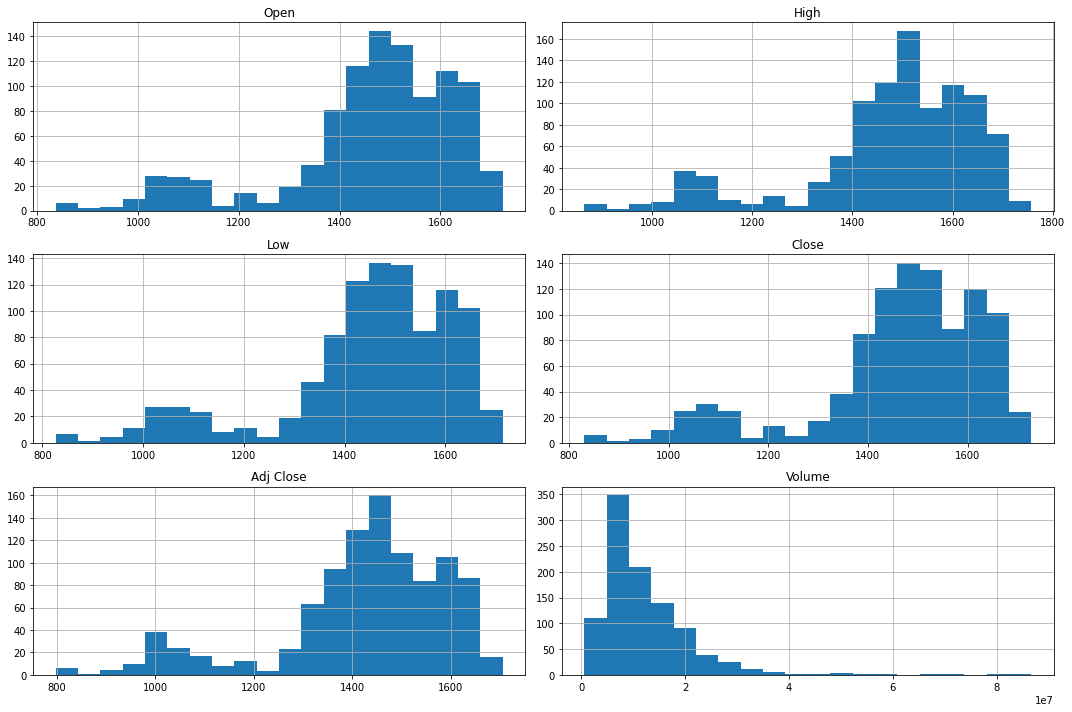

In [10]:
df.hist(bins=20, figsize=(15,10))  # Here we create histograms for each column in the DataFrame 'df'.

plt.tight_layout() # Here we Adjust the layout to prevent overlap.

plt.show() # It is used to show the histograms.

### Creating New Dataframe df1

In [12]:
df1 = df[['Adj Close']]

In [13]:
#Create one more column Prediction shifted 10 days up. 

df1['Prediction'] = df1[['Adj Close']].shift(-10)

C:\Users\Manish\AppData\Local\Temp\ipykernel_10848\1258609162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Prediction'] = df1[['Adj Close']].shift(-10)


In [14]:
#printing top 20 data set
df1.head(10)

,Adj Close,Prediction
0,803.166138,960.938599
1,797.406189,981.338135
2,822.797668,961.610535
3,825.149597,991.993774
4,805.278015,975.242310
5,818.285767,947.786804
6,867.484680,952.154724
7,907.419800,929.835205
8,913.563599,943.418884
9,948.122803,911.835632


In [15]:
#printing bottom 20 data set
df1.tail(10)

,Adj Close,Prediction
982,1499.128662,NaN
983,1502.137695,NaN
984,1485.859985,NaN
985,1462.676514,NaN
986,1428.000000,NaN
987,1437.900024,NaN
988,1455.250000,NaN
989,1460.949951,NaN
990,1438.500000,NaN
991,1448.949951,NaN


In [16]:
#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(df1.drop(['Prediction'], axis = 1))

#Remove the last 15 rows
X = X[:-10]
print(X)

[[ 803.166138]
 [ 797.406189]
 [ 822.797668]
 [ 825.149597]
 [ 805.278015]
 [ 818.285767]
 [ 867.48468 ]
 [ 907.4198  ]
 [ 913.563599]
 [ 948.122803]
 [ 960.938599]
 [ 981.338135]
 [ 961.610535]
 [ 991.993774]
 [ 975.24231 ]
 [ 947.786804]
 [ 952.154724]
 [ 929.835205]
 [ 943.418884]
 [ 911.835632]
 [ 950.762756]
 [ 940.059021]
 [ 979.130188]
 [ 991.993774]
 [ 987.578003]
 [1000.585632]
 [ 991.177856]
 [ 987.578003]
 [1014.169312]
 [1032.984985]
 [1023.193115]
 [1041.192749]
 [1045.800781]
 [1030.968994]
 [1058.856445]
 [1060.92041 ]
 [1065.912231]
 [1079.927856]
 [1060.872192]
 [1037.016846]
 [1016.473328]
 [1011.001465]
 [1020.02533 ]
 [1054.488403]
 [1087.703857]
 [1092.983765]
 [1081.271729]
 [1085.15979 ]
 [1074.312012]
 [1036.296753]
 [1043.160767]
 [1021.993164]
 [1008.601624]
 [ 991.465942]
 [ 961.89856 ]
 [ 999.96167 ]
 [ 986.426025]
 [ 999.049683]
 [1002.073669]
 [1008.601624]
 [1023.961182]
 [1021.129272]
 [1016.665466]
 [ 993.049805]
 [ 991.417908]
 [1014.217346]
 [1023.913

In [17]:
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df1['Prediction'])
# Remove Last 10 rows
y = y[:-10]
print(y)

[ 960.938599  981.338135  961.610535  991.993774  975.24231   947.786804
  952.154724  929.835205  943.418884  911.835632  950.762756  940.059021
  979.130188  991.993774  987.578003 1000.585632  991.177856  987.578003
 1014.169312 1032.984985 1023.193115 1041.192749 1045.800781 1030.968994
 1058.856445 1060.92041  1065.912231 1079.927856 1060.872192 1037.016846
 1016.473328 1011.001465 1020.02533  1054.488403 1087.703857 1092.983765
 1081.271729 1085.15979  1074.312012 1036.296753 1043.160767 1021.993164
 1008.601624  991.465942  961.89856   999.96167   986.426025  999.049683
 1002.073669 1008.601624 1023.961182 1021.129272 1016.665466  993.049805
  991.417908 1014.217346 1023.913147 1016.61731  1042.200806 1072.344116
 1074.887939 1073.687988 1067.592041 1069.89624  1071.192017 1082.183838
 1088.759644 1085.640015 1074.504028 1066.056152 1067.928101 1052.616455
 1046.904663 1035.480957 1015.609192 1027.657104 1049.880737 1040.232666
 1014.985352 1007.305542  993.961853 1005.337585  9

## Data Splitting

In [18]:
# Split the data into train and test with 80 & 20 % respectively

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVR Model with kernel RBF

## Model Fitting

In [19]:
# SVM Model
svr = SVR(kernel='rbf', C=2e3, gamma=0.0001)
# Train the model 
svr.fit(x_train, y_train)

SVR(C=2000.0, gamma=0.0001)

### Accuracy of the model

In [20]:
# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.8858043709236787


**Accuracy of the Model is 88%**

In [21]:
forecast = np.array(df1.drop(['Prediction'],axis=1))[-10:]
print(forecast)

[[1499.128662]
 [1502.137695]
 [1485.859985]
 [1462.676514]
 [1428.      ]
 [1437.900024]
 [1455.25    ]
 [1460.949951]
 [1438.5     ]
 [1448.949951]]


## Prediction

In [22]:
# support vector model predictions for the next ‘15’ days
svm_prediction = svr.predict(forecast)
print(svm_prediction)

[1478.72752319 1483.54544112 1461.21282158 1447.03572634 1446.91983967
 1446.84577383 1446.13337232 1446.70987603 1446.81114828 1446.15650944]


### Actual and predicted values

In [23]:
dataframe = pd.DataFrame({'Actual':forecast.flatten(),'predicted':svm_prediction.flatten()})
dataframe.tail(20)

,Actual,predicted
0,1499.128662,1478.727523
1,1502.137695,1483.545441
2,1485.859985,1461.212822
3,1462.676514,1447.035726
4,1428.000000,1446.919840
5,1437.900024,1446.845774
6,1455.250000,1446.133372
7,1460.949951,1446.709876
8,1438.500000,1446.811148
9,1448.949951,1446.156509


### MAE, MSE, RMSE, R-square

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
# Printout relevant metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(forecast, svm_prediction))
print("Mean squared Error:",metrics.mean_squared_error(forecast, svm_prediction))
print("root mean squared Error:",np.sqrt(metrics.mean_squared_error(forecast, svm_prediction)))
print("R Square Score is :",r2_score(forecast, svm_prediction))

Mean Absolute Error: 14.160822577149498
Mean squared Error: 241.47531825015827
root mean squared Error: 15.539476125344711
R Square Score is : 0.6018750247417817


 **SVR Model**
   - **MAE** = **14.16**
   - **MSE** = **241.47**
   - **RMSE** = **15.53**
   - **R-square score** = **0.60**

Root Mean Square Error (RMSE) measures the average deviation of the predicted values from the actual values. R² Score (coefficient of determination) measures the proportion of the variance in the dependent variable (median house value) that is predictable from the independent variables. R² score ranges from 0 to 1, with higher values indicating better fit.

**Best Configuration = Lower RMSE and higher R-square score**

## Evaluation Metrics

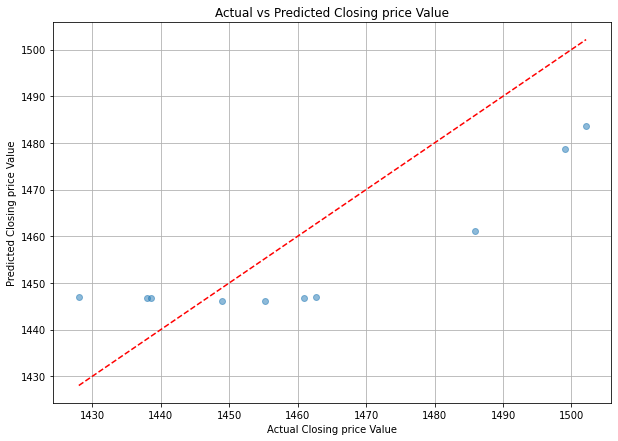

In [25]:
# Plotting the predicted line and scatter plot of y_test values
plt.figure(figsize=(10, 7))
plt.scatter(forecast, svm_prediction, alpha=0.5)
plt.plot([min(forecast), max(forecast)], [min(forecast), max(forecast)], color='red', linestyle='--')
plt.xlabel('Actual Closing price Value')
plt.ylabel('Predicted Closing price Value')
plt.title('Actual vs Predicted Closing price Value')
plt.grid(True)
plt.show()

## Plotting the Actual and Predicted Prices for HDFC BANK Stocks

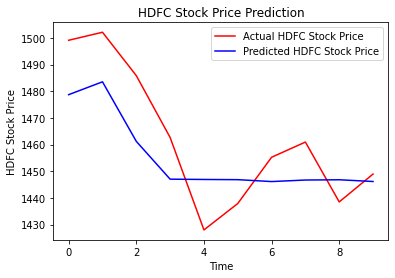

In [26]:
plt.plot(forecast, color = 'red', label = 'Actual HDFC Stock Price')
plt.plot(svm_prediction, color = 'blue', label = 'Predicted HDFC Stock Price')
plt.title('HDFC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HDFC Stock Price')
plt.legend()

## Interpretation

**With an RMSE of 15.53 and an R² of 0.60 using SVR with the RBF kernel, the model's predictive accuracy is relatively moderate.**